# Asset Price Prediction in Finance and Clustering

## Introduction

In the complex and dynamic context of the financial market, the precise prediction of asset prices remains a crucial challenge for investors and analysts. In this study, we focus on the application of linear regression to anticipate movements in asset prices, concurrently comparing the results with advanced clustering methods such as Kmeans, Hclust, and Dbscan.

Here is our research question: the search for effective methods to anticipate financial asset prices.

Study Method:

The use of linear regression provides a classic yet robust approach to model the relationships between time variables and asset prices. This method allows us to create a trendline that can be compared to historical data, facilitating the evaluation of the relevance of our model.

Simultaneously, the integration of clustering methods adds an additional dimension to our analysis. Clustering algorithms, such as Kmeans, Hclust, and Dbscan, enable us to group data into homogeneous sets, revealing intrinsic structures and potential nonlinear relationships in the time series of asset prices.

The objective of this study is to compare the predictive performance of linear regression with that of clustering methods, highlighting the advantages and limitations of each approach. By examining historical data, we will assess the accuracy of price predictions generated by linear regression and compare them to clusters identified by clustering algorithms.

This comparative analysis aims to provide in-depth perspectives on the relevance of different approaches in the financial context, offering valuable insights for professionals seeking to optimize their investment and risk management strategies.

Team Members and Project Participation:

- Maximilien STRIEBIG, data research and model implementation.
- Arthur XU, data comparison and selection of graphics.
- Pablo THOMASSIN, notebook writing, model correction, and validation of models & results.

Each team member contributed one-third to the project. The workload was evenly distributed, ensuring fair participation from all team members.

## Problem Resolution

### Linear Regression Model to Predict Data


Importing various libraries :

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

For the example, we will be working with assets from Amazon, an American company. Thus, we define a period by specifying the asset.

In [ ]:
stock_symbol = 'AMZN'
start_date = '2021-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')  # Current date

Now, using the yfinance module, let's download the data

In [ ]:
data = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d')

A bit of preprocessing: we create a new column for the closing prices of the following day's markets and clean up the index on the 'Date' column.

In [ ]:
# Index reset
data = data.reset_index()
prediction = 'High'
# New Column
data['Next_Day'] = data[prediction].shift(-1)
data['Open_Next_Day'] = data['Open'].shift(-1)

Now, we extract our features, namely the variable X, and our prediction, the variable y. Note that the last row will be composed of NaN values, so we drop it

In [ ]:
# Extract features
X = data[['Open', 'High', 'Low','Close', 'Volume','Open_Next_Day','Adj Close']]
y = data['Next_Day']

# Drop the last row
X = X[:-1]
y = y[:-1]

Now, we move on to training the model

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Then, we evaluate its accuracy with two types of errors: mean squared error and R-squared

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

We observe that the model predicts the data with over 99% accuracy according to the R-squared metric. Furthermore, through the mean squared error (MSE), we can see that the quadratic error is small. This indicates that our model is relevant and performs well.

Finally, we display a graph to compare our prediction with the current price, and we can clearly see our linear regression.

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 2.3885113628888006
R-squared: 0.9969671336431016


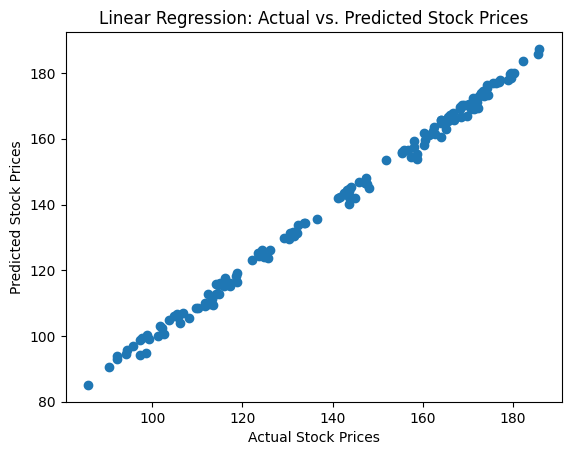

          Date        Open        High         Low       Close   Adj Close  \
0   2021-01-04  163.500000  163.600006  157.201004  159.331497  159.331497   
1   2021-01-05  158.300507  161.169006  158.253006  160.925507  160.925507   
2   2021-01-06  157.324005  159.875504  156.557999  156.919006  156.919006   
3   2021-01-07  157.850006  160.427002  157.750000  158.108002  158.108002   
4   2021-01-08  159.000000  159.531998  157.110001  159.134995  159.134995   
..         ...         ...         ...         ...         ...         ...   
726 2023-11-21  143.910004  144.050003  141.500000  143.899994  143.899994   
727 2023-11-22  144.570007  147.740005  144.570007  146.710007  146.710007   
728 2023-11-24  146.699997  147.199997  145.320007  146.740005  146.740005   
729 2023-11-27  147.529999  149.259995  146.880005  147.729996  147.729996   
730 2023-11-28  146.979996  147.600006  145.529999  147.029999  147.029999   

       Volume    Next_Day  Open_Next_Day  
0    88228000  161.1

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.title('Linear Regression: Actual vs. Predicted Stock Prices')
plt.show()
print(data)

### Comparison of the price between a prediction and a known previous price

User Input

In [ ]:
user_date_str = input("Enter a date (YYYY-MM-DD) to predict the closing price of the next day: ")

# User input for a specific date
user_date = datetime.strptime(user_date_str, "%Y-%m-%d").date()

Selection of the correct date in the data rows, extraction of features, and predictions

In [ ]:
# Find the corresponding row in the data
user_data = data[data['Date'].dt.date == user_date]
next_day = data[data['Date'] == (user_data['Date'].values[0] + pd.DateOffset(days=1))]
# Extract features
user_features = user_data[['Open', 'High', 'Low','Close', 'Volume','Open_Next_Day','Adj Close']]
actual_close_next_day= next_day[prediction].values[0]
# Make a prediction
user_prediction = model.predict(user_features)

Display of the predicted and current values

In [ ]:
print(f"\nPredicted High Price of the Next Day on {user_date}: ${user_prediction[0]:.2f}")
print(f"Actual High Price of the Next Day: ${actual_close_next_day:.2f}")
print(f"Open Price of the Next Day: ${next_day['Open'].values[0]:.2f}")

Comparison and percentage difference

In [ ]:
percentage_difference = ((user_prediction[0] - actual_close_next_day) / actual_close_next_day) * 100
print(f"Percentage Difference: {percentage_difference:.2f}%")

Enter a date (YYYY-MM-DD) to predict the closing price of the next day: 2023-11-08

Predicted High Price of the Next Day on 2023-11-08: $143.55
Actual High Price of the Next Day: $142.65
Open Price of the Next Day: $142.02
Percentage Difference: 0.63%


A percentage difference of less than 1% indicates good health of the prediction compared to the current value, and this model is competent. However, to critique the model, we can argue on two points:

- The model does not allow for the possibility of extreme values that may be characterized by a market collapse.
- The model does not incorporate any consideration of risk aversion. Perhaps a prediction accuracy of 1% is too fine for some investors and not precise enough for others. Indeed, being able to gauge risk is an important part of prediction.

This makes it a good model for study but perhaps a bit too weak for a real-world use case.

### Clustering Method

Reprocessing on closing prices to properly rearrange the column

In [ ]:
closing_prices = data['Close'].values.reshape(-1, 1)

Application of the K-means method

In [ ]:
n_clusters_kmeans = 3
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(closing_prices)

Application of the Hclust method

In [ ]:
n_clusters_hclust = 3
hclust = AgglomerativeClustering(n_clusters=n_clusters_hclust)
data['Cluster_Hclust'] = hclust.fit_predict(closing_prices)

Application of the DBScan method

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(closing_prices)

Visualization and Graphs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


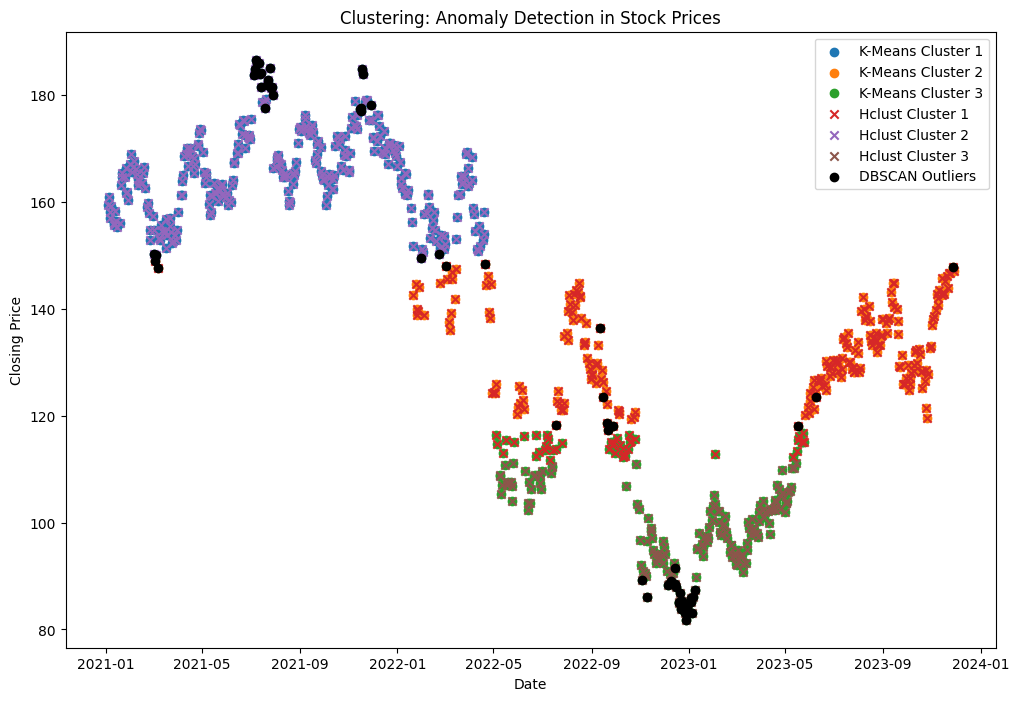

In [ ]:
# Visualize the clusters with legend
plt.figure(figsize=(12, 8))

# K-Means
for cluster in range(n_clusters_kmeans):
    cluster_data = data[data['Cluster_KMeans'] == cluster]
    plt.scatter(cluster_data['Date'], cluster_data['Close'], label=f'K-Means Cluster {cluster + 1}')

# Hclust
for cluster in range(n_clusters_hclust):
    cluster_data = data[data['Cluster_Hclust'] == cluster]
    plt.scatter(cluster_data['Date'], cluster_data['Close'], label=f'Hclust Cluster {cluster + 1}', marker='x')

# DBSCAN
outliers = data[data['Cluster_DBSCAN'] == -1]
plt.scatter(outliers['Date'], outliers['Close'], label='DBSCAN Outliers', color='black', marker='o')

#Visualization
plt.title('Clustering: Anomaly Detection in Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

We notice that K-Means and Hclust fit the data very neatly, while DBScan only takes into account changes in trend within it.

## Conclusion

In conclusion, this study tackled the crucial challenge of asset price prediction in the complex and dynamic context of the financial market. Exploring the application of linear regression, a classical yet robust approach, enabled the creation of a trendline providing insight into anticipated price movements, while facilitating a comparative assessment based on historical data.

The innovative integration of clustering methods, notably Kmeans, Hclust, and Dbscan, added an additional dimension to our analysis. These algorithms revealed intrinsic structures and potential nonlinear relationships in asset price time series, thereby enriching our understanding of market dynamics.

Comparing predictive performance between linear regression and clustering methods highlighted the strengths and limitations of each approach. The obtained results were meticulously evaluated by examining the accuracy of predictions in relation to identified clusters. Indicators such as Mean Squared Error and R-squared provided quantitative measures of this performance, reinforcing our understanding of the respective advantages of each method.

This comparative analysis offers in-depth insights into the relevance of different approaches to asset price forecasting, providing crucial insights for professionals in the financial sector. The results obtained can be considered as a compass guiding investment and risk management strategies, thus making a significant contribution to improving decision-making practices in an ever-evolving financial environment.

## References

# Explanatory Reference List of Python Modules

1. **yfinance (alias yf):**
   - *Description:* yfinance is a Python library that enables easy access to financial data from Yahoo Finance.
   - *Usage in code:* `import yfinance as yf`

2. **pandas (alias pd):**
   - *Description:* pandas is a Python library that provides flexible and high-performance data structures for manipulating and analyzing data.
   - *Usage in code:* `import pandas as pd`

3. **train_test_split from sklearn.model_selection:**
   - *Description:* `train_test_split` is a function in scikit-learn that splits a dataset into training and testing sets.
   - *Usage in code:* `from sklearn.model_selection import train_test_split`

4. **LinearRegression from sklearn.linear_model:**
   - *Description:* LinearRegression is a linear regression model available in scikit-learn for performing linear regressions.
   - *Usage in code:* `from sklearn.linear_model import LinearRegression`

5. **mean_squared_error, r2_score from sklearn.metrics:**
   - *Description:*
     - `mean_squared_error` calculates the mean squared error between predicted and actual values.
     - `r2_score` calculates the coefficient of determination R², measuring the proportion of variance in the dependent variable explained by the model.
   - *Usage in code:* `from sklearn.metrics import mean_squared_error, r2_score`

6. **matplotlib.pyplot as plt:**
   - *Description:* matplotlib is a Python visualization library, and pyplot is a module in this library used for creating plots.
   - *Usage in code:* `import matplotlib.pyplot as plt`

7. **datetime, timedelta from datetime:**
   - *Description:* datetime is a module for working with dates and times, and timedelta is a class for representing durations.
   - *Usage in code:* `from datetime import datetime, timedelta`

8. **KMeans, AgglomerativeClustering, DBSCAN from sklearn.cluster:**
   - *Description:*
     - `KMeans` is a clustering algorithm based on the k-means method.
     - `AgglomerativeClustering` is a hierarchical clustering algorithm.
     - `DBSCAN` (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm based on density.
   - *Usage in code:* `from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN`